
# Breast cancer decision tree analysis: classification problem

https://github.com/jwheeldon/test_ml.git

Decision trees can either be grouped into classification trees or regression trees. A classification tree analysis predicts the class to which the data belongs, whist a regression tree predicts a continuous outcome (such as price of a house). Example using Wisconsin breast cancer dataset, supervised learning classification of malignant (0) vs beningn (1) tumours across 30 features.

## Import dataset and packages

In [72]:
from sklearn import datasets
from sklearn import tree
from sklearn import cross_validation
import pandas as pd
import numpy as np
import graphviz

raw = datasets.load_breast_cancer()

## Data exploration

In [73]:
raw_pd = pd.DataFrame(raw.data)
raw_pd.columns=raw.feature_names
print(raw.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [74]:
raw_pd.shape

(569, 30)

In [75]:
raw_pd['target'] = pd.Series(raw.target)

Use descriptive statistics to scan data for any errors or sampling biases. Stratify by target to investigate differences in features by tumour type.

In [76]:
raw_pd.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [77]:
raw_pd.groupby('target').describe()

area error                                                        \
            count       mean        std     min      25%     50%    75%   
target                                                                    
0           212.0  72.672406  61.355268  13.990  35.7625  58.455  94.00   
1           357.0  21.135148   8.843472   6.802  15.2600  19.630  25.03   

               compactness error            ...   worst symmetry          \
           max             count      mean  ...              75%     max   
target                                      ...                            
0       542.20             212.0  0.032281  ...         0.359225  0.6638   
1        77.11             357.0  0.021438  ...         0.298300  0.4228   

       worst texture                                                      \
               count       mean       std    min      25%     50%    75%   
target                                                                     
0              212.0  29.318208  5.434804  16.67  25.7825  28.945  32.69   
1              357.0  23.515070  5.493955  12.02  19.5800  22.820  26.51   

               
          max  
target         
0       49.54  
1       41.78  

[2 rows x 240 columns]

## Split dataset into training vs test data

Use the model_selection module of scikit-learn (cross_validation module now deprecated) to divide data into 70% training and 30% test subsets.

In [91]:
x_train, x_test = model_selection.train_test_split(raw_pd, test_size=0.3, random_state=33)

## Decision tree classifier model

Define the classifier model and fit cases to targets. Export tree to graphviz and render.
The box shade reflects the strength of the classification between benign (blue) and malignant (orange) tumours using the gini calculation. A white box represents an equal distribution of data (unable to classify). Gini is a cost function which calculates the purity of each node (0-0.5). A gini score of 0 would represent a completely pure node, a gini of 0.5 would reflect an equal split.

In [87]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train.iloc[:,0:30], x_train['target'])

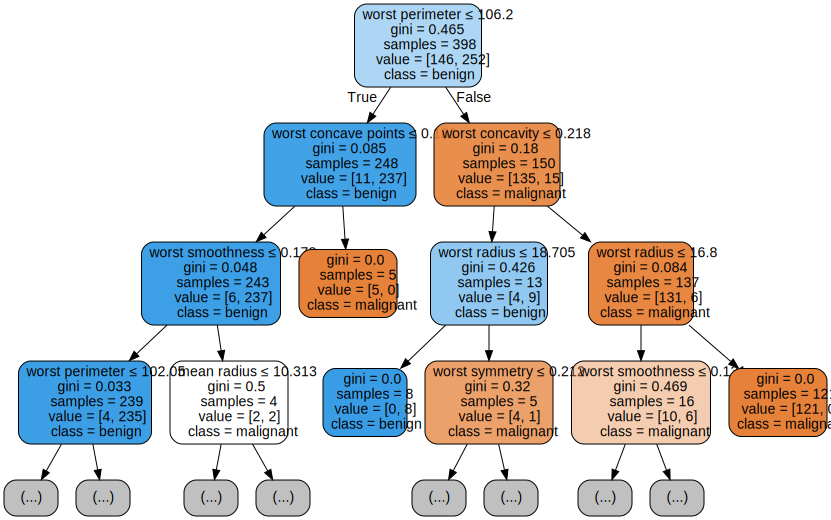

In [90]:
out = tree.export_graphviz(clf,
                           out_file=None,
                           feature_names = raw.feature_names,
                           class_names = raw.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=3
                          )

graph = graphviz.Source(out)
graph